<a href="https://colab.research.google.com/github/nanoSur/Data-Science-Collection/blob/main/Haberman_Cancer_Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Haberman's Survival : Exploratory Data Analysis** \
Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
haberman_data=pd.read_csv('haberman.csv')

In [ ]:
haberman_data=haberman_data.rename(columns={'30':'Age','64':'Oper_Year','1':'axil_nodes','1.1':'Surv_status'});

In [ ]:
haberman_data.head()

,Age,Oper_Year,axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [ ]:
haberman_data.shape

(305, 4)

Age of patient at the time of operation (numerical)\
Patient's year of operation (year - 1900, numerical)\
Number of positive axillary nodes detected (numerical)\
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

In [ ]:
gSurvival=haberman_data.groupby('Surv_status')

for survival_status,survival_data in gSurvival:
    print(survival_status);
    print(survival_data);

1
     Age  Oper_Year  axil_nodes  Surv_status
0     30         62           3            1
1     30         65           0            1
2     31         59           2            1
3     31         65           4            1
4     33         58          10            1
..   ...        ...         ...          ...
297   73         68           0            1
299   74         63           0            1
300   75         62           1            1
301   76         67           0            1
302   77         65           3            1

[224 rows x 4 columns]
2
     Age  Oper_Year  axil_nodes  Surv_status
6     34         59           0            2
7     34         66           9            2
23    38         69          21            2
33    39         66           0            2
42    41         60          23            2
..   ...        ...         ...          ...
285   70         58           4            2
292   72         63           0            2
298   74         65        

In [ ]:
survived_1=gSurvival.get_group(1)
survived_2=gSurvival.get_group(2)

# print(survived_1)
# print(survived_2.empty)

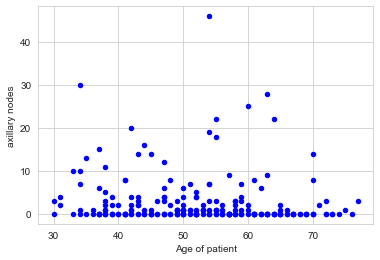

In [ ]:
survived_1.plot(kind='scatter',x='Age',y='axil_nodes',color='b')
plt.xlabel('Age of patient')
plt.ylabel('axillary nodes')
plt.show()

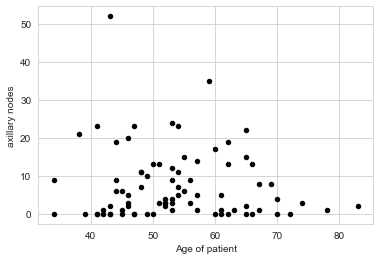

In [ ]:
survived_2.plot(kind='scatter',x='Age',y='axil_nodes',color='k')
plt.xlabel('Age of patient')
plt.ylabel('axillary nodes')
plt.show()

In [ ]:
axil_nodes_survived_null=survived_1[survived_1['axil_nodes']==0].value_counts()
axil_nodes_survived_not_null=survived_1[survived_1['axil_nodes']>0].value_counts()
print("No of auxillary nodes were not found=",axil_nodes_survived_null.count())
print("No of auxillary nodes were found but survived more than 5 years=",axil_nodes_survived_not_null.count())


No of auxillary nodes were not found= 103
No of auxillary nodes were found but survived more than 5 years= 106


In [ ]:
axil_nodes_null=survived_2[survived_2['axil_nodes']==0].value_counts()
axil_nodes_not_null=survived_2[survived_2['axil_nodes']>0].value_counts()
print("No of auxillary nodes were not found=",axil_nodes_null.count())
print("No of auxillary nodes were found but did not survive more than 5 years=",axil_nodes_not_null.count())

No of auxillary nodes were not found= 18
No of auxillary nodes were found but did not survive more than 5 years= 61


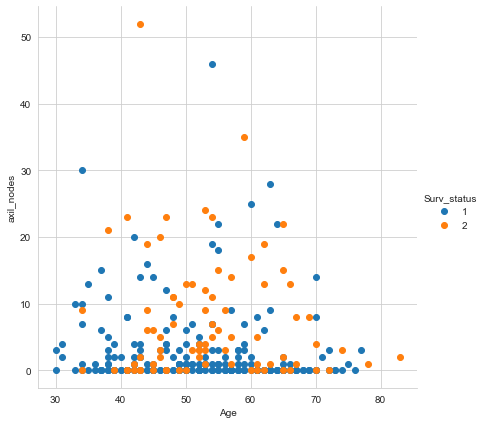

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman_data,hue="Surv_status",height=6) \
    .map(plt.scatter,"Age","axil_nodes") \
    .add_legend();
plt.show();

As it can be seen from the scatter the patients who have died from Cancer have some dependency on axillary nodes and few have no nodes still haven't survived the operation.
Lets see a pair plot to visualize the dependency on the other factors

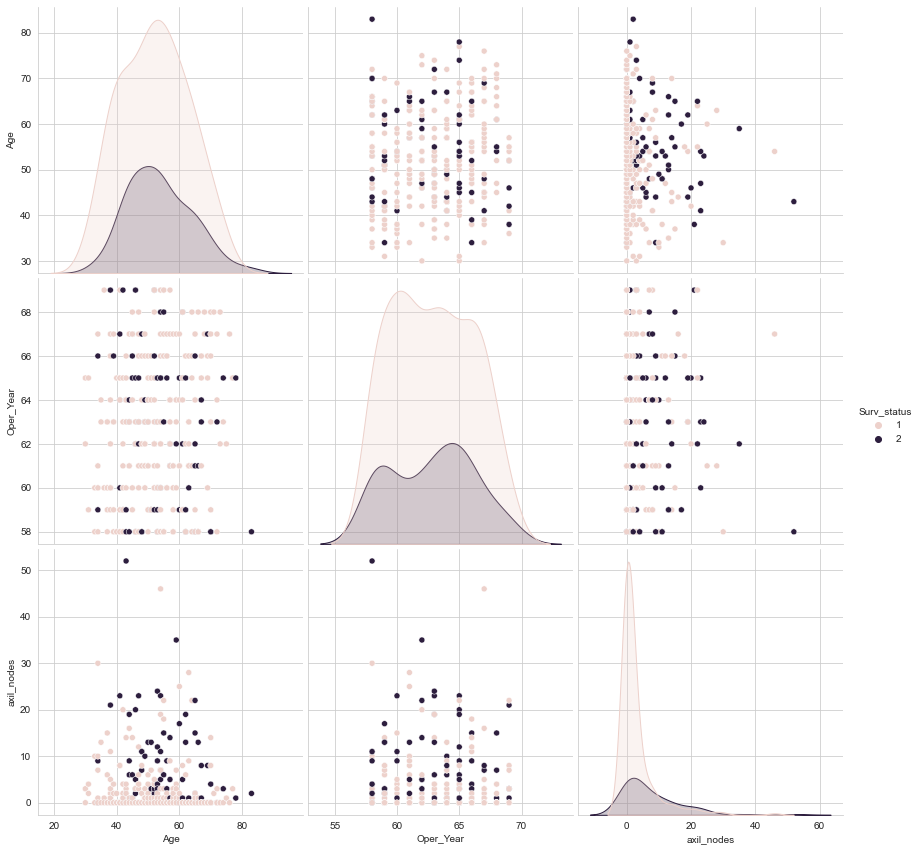

In [ ]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman_data,hue='Surv_status',height=4)
plt.show()

In [ ]:
survived_2['Age'].std()

10.16713720829741

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


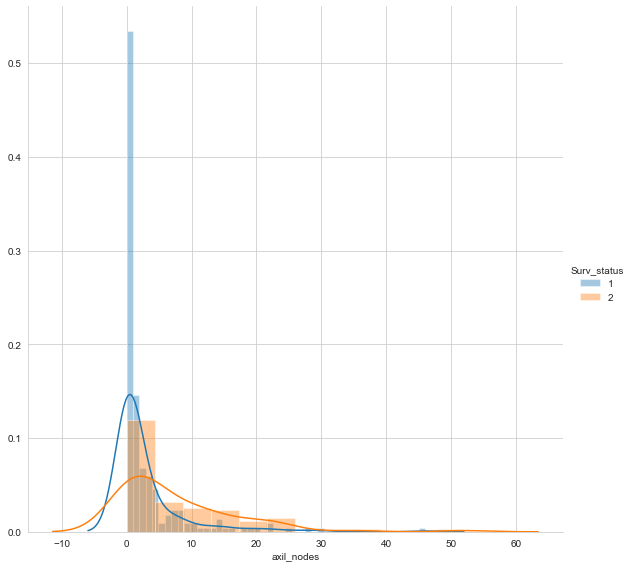

In [ ]:
sns.FacetGrid(haberman_data,hue='Surv_status',height=8)\
    .map(sns.distplot,'axil_nodes')\
    .add_legend()
plt.show()

**PDF CDF**

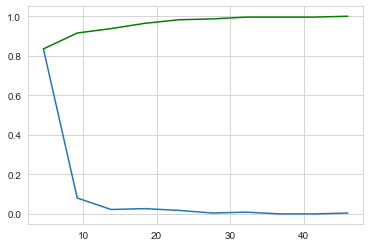

46

In [ ]:
#Plot PDF

counts,bin_edges=np.histogram(survived_1['axil_nodes'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf,'g-')
plt.show()

survived_1['axil_nodes'].max()

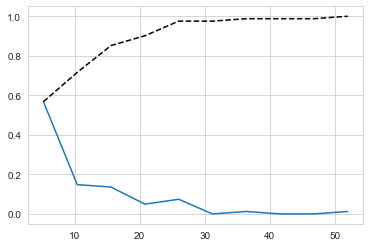

52

In [ ]:
counts,bin_edges=np.histogram(survived_2['axil_nodes'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf,'k--')
plt.show()

survived_2['axil_nodes'].max()

In [ ]:
status_yes=haberman_data.loc[haberman_data["Surv_status"]==1]
status_no=haberman_data.loc[haberman_data["Surv_status"]==2]

print("Survival Status : YES:")
print(status_yes.describe())
print("Survival Status : NO:")
print(status_no.describe())

Survival Status : YES:
              Age   Oper_Year  axil_nodes  Surv_status
count  224.000000  224.000000  224.000000        224.0
mean    52.116071   62.857143    2.799107          1.0
std     10.937446    3.229231    5.882237          0.0
min     30.000000   58.000000    0.000000          1.0
25%     43.000000   60.000000    0.000000          1.0
50%     52.000000   63.000000    0.000000          1.0
75%     60.000000   66.000000    3.000000          1.0
max     77.000000   69.000000   46.000000          1.0
Survival Status : NO:
             Age  Oper_Year  axil_nodes  Surv_status
count  81.000000  81.000000   81.000000         81.0
mean   53.679012  62.827160    7.456790          2.0
std    10.167137   3.342118    9.185654          0.0
min    34.000000  58.000000    0.000000          2.0
25%    46.000000  59.000000    1.000000          2.0
50%    53.000000  63.000000    4.000000          2.0
75%    61.000000  65.000000   11.000000          2.0
max    83.000000  69.000000   52.000

In [ ]:
print("Mean");
print(np.mean(survived_1['Age']));
print(np.mean(survived_2['Age']));
print("*******")
print(np.mean(survived_1['axil_nodes']));
print(np.mean(survived_2['axil_nodes']));

print("\nStd Dev");
print(np.std(survived_1['Age']));
print(np.std(survived_2['Age']));
print("*******")
print(np.std(survived_1['axil_nodes']));
print(np.std(survived_2['axil_nodes']));

Mean
52.11607142857143
53.67901234567901
*******
2.799107142857143
7.45679012345679

Std Dev
10.913004640364269
10.10418219303131
*******
5.869092706952767
9.128776076761632


In [ ]:
#Median 
print("Median");
print(np.median(survived_1['Age']));
print(np.median(survived_2['Age']));
print("*******")
print(np.median(survived_1['axil_nodes']));
print(np.median(survived_2['axil_nodes']));

Median
52.0
53.0
*******
0.0
4.0


In [ ]:
print("Quartile")
print(np.percentile(survived_1['Age'],np.arange(0,101,25)));
print(np.percentile(survived_1['axil_nodes'],np.arange(0,101,25)));

print(np.percentile(survived_2['Age'],np.arange(0,101,25)));
print(np.percentile(survived_2['axil_nodes'],np.arange(0,101,25)));
print(np.percentile(survived_2['Oper_Year'],np.arange(0,101,25)));

Quartile
[30. 43. 52. 60. 77.]
[ 0.  0.  0.  3. 46.]
[34. 46. 53. 61. 83.]
[ 0.  1.  4. 11. 52.]
[58. 59. 63. 65. 69.]


In [ ]:
print("90th Percentile")
print(np.percentile(survived_1['Age'],90));
print(np.percentile(survived_1['axil_nodes'],90));

print(np.percentile(survived_2['Age'],90));
print(np.percentile(survived_2['axil_nodes'],90));

90th Percentile
67.0
8.0
67.0
20.0


In [ ]:
print("MAD-Median Absolute Distribution");
from statsmodels import robust

print(robust.mad(survived_1['Age']));
print(robust.mad(survived_1['axil_nodes']));

print(robust.mad(survived_2['Age']));
print(robust.mad(survived_2['axil_nodes']));

MAD-Median Absolute Distribution
13.343419966550417
0.0
11.860817748044816
5.930408874022408


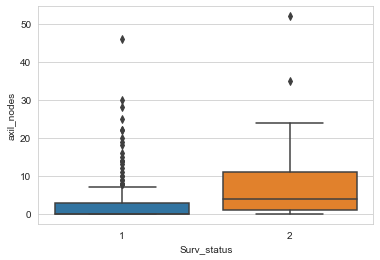

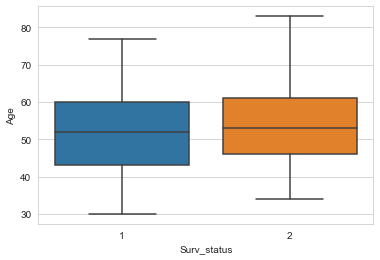

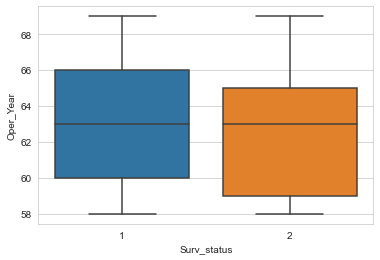

In [ ]:
sns.boxplot(x='Surv_status',y='axil_nodes',data=haberman_data)
plt.show()

sns.boxplot(x='Surv_status',y='Age',data=haberman_data)
plt.show()

sns.boxplot(x='Surv_status',y='Oper_Year',data=haberman_data)
plt.show()


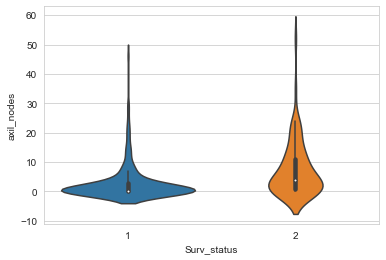

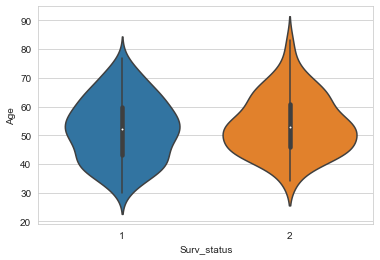

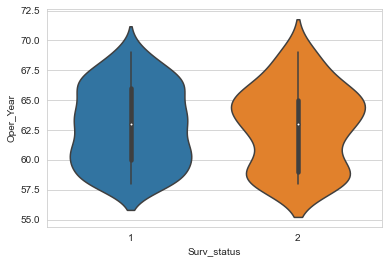

In [ ]:
sns.violinplot(x='Surv_status',y='axil_nodes',data=haberman_data)
plt.show()

sns.violinplot(x='Surv_status',y='Age',data=haberman_data)
plt.show()

sns.violinplot(x='Surv_status',y='Oper_Year',data=haberman_data)
plt.show()

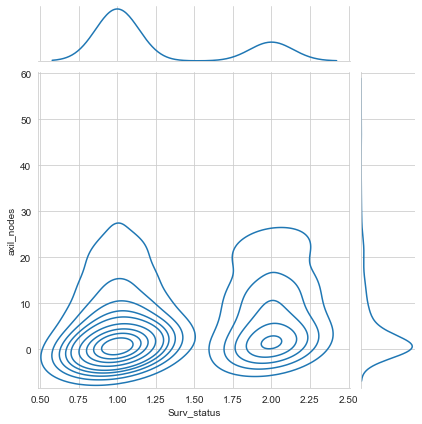

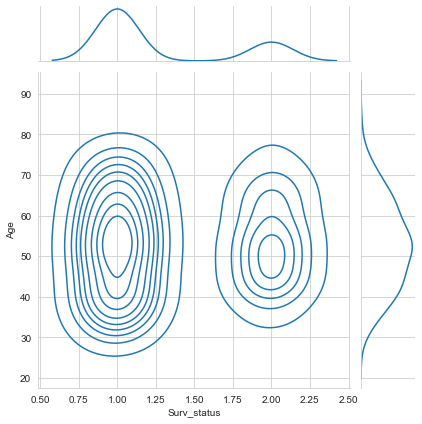

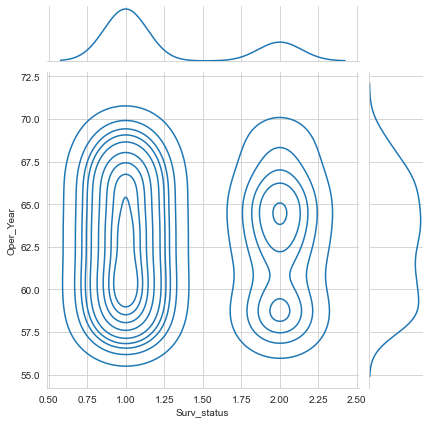

In [ ]:
sns.jointplot(x='Surv_status',y='axil_nodes',data=haberman_data,kind='kde')
plt.show()

sns.jointplot(x='Surv_status',y='Age',data=haberman_data,kind='kde')
plt.show()

sns.jointplot(x='Surv_status',y='Oper_Year',data=haberman_data,kind='kde')
plt.show()

**OBSERVATION**

1. The type of classification is based on **Binary Classification** as it has two types of outputs: Survived/Not Survived
2. The data provided int the pubic forum has given a very few clear ideas about the dependency of the survival rate based on Age of the patient at the time of operation,Tear of operation and auxillary nodes.Therefore unbalanced dataset but it contains no null values.
3. From the plots(Survived):\
The age survival range is between 42-60.\
Auxillary nodes=0 have highest survival range.\
Operation Year 60 has the most survival rate.
4. From the pplots(Survived Less):\
The less survival age > 53 and ages>77 were not able to survive.\
Auxillary Nodes >10 have not survived.\
Operation Year from 58-64 has the most non-surviving rate.